# Data Exploration

We will conduct exploratory data analysis (EDA) to understand the dataset's structure, identify missing values, and visualize relationships between features. This will help us determine the most relevant features for our regression model.

## Dataset Features

We will use the [AI/ML Salaries](https://www.kaggle.com/datasets/cedricaubin/ai-ml-salaries) dataset from Kaggle, which contains comprehensive information about data science salaries from 2020 to 2023. 

The dataset contains the following features:

| Feature | Description |
|---------|-------------|
| work_year | The year of the data related to the job salary. |
| experience_level | The level of experience of the employee (e.g., entry-level, mid-level, senior-level). |
| employment_type | The type of employment (e.g., full-time, part-time, contract). |
| job_title | The title or role of the employee within the data science field. |
| salary | The salary of the employee. |
| salary_currency | The currency in which the salary is denoted. |
| salary_in_usd | The salary converted to US dollars for standardization. |
| employee_residence | The residence location of the employee. |
| remote_ratio | The ratio of remote work allowed for the position. |
| company_location | The location of the company. |
| company_size | The size of the company based on employee count or revenue. |

## Explore Dataset

Load the dataset.

In [6]:
import pandas as pd

from ds_salaries_predict.config import RAW_DATA_DIR

data = pd.read_csv(RAW_DATA_DIR / "salaries.csv")

data.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
1,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
2,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
3,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
4,2025,SE,FT,Engineer,143000,USD,143000,US,0,US,M


Reorder the columns for better readability.

In [7]:
new_column_order = [
    "work_year",
    "experience_level",
    "employment_type",
    "job_title",
    "employee_residence",
    "remote_ratio",
    "company_location",
    "company_size",
    "salary",
    "salary_currency",
    "salary_in_usd",
]

data = data.loc[:, new_column_order]

Analyze the dataset metadata.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73148 entries, 0 to 73147
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           73148 non-null  int64 
 1   experience_level    73148 non-null  object
 2   employment_type     73148 non-null  object
 3   job_title           73148 non-null  object
 4   employee_residence  73148 non-null  object
 5   remote_ratio        73148 non-null  int64 
 6   company_location    73148 non-null  object
 7   company_size        73148 non-null  object
 8   salary              73148 non-null  int64 
 9   salary_currency     73148 non-null  object
 10  salary_in_usd       73148 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 6.1+ MB


From the summary, we can see that the dataset contains 73,148 entries with no missing values.

### Check Numerical Features Summary

In [9]:
data.describe()

,work_year,remote_ratio,salary,salary_in_usd
count,73148.000000,73148.000000,7.314800e+04,73148.000000
mean,2023.831192,21.582955,1.625534e+05,158013.748619
std,0.477551,41.023051,1.925761e+05,72501.304728
min,2020.000000,0.000000,1.400000e+04,15000.000000
25%,2024.000000,0.000000,1.069575e+05,106890.000000
50%,2024.000000,0.000000,1.480000e+05,147500.000000
75%,2024.000000,0.000000,2.000000e+05,199700.000000
max,2025.000000,100.000000,3.040000e+07,800000.000000


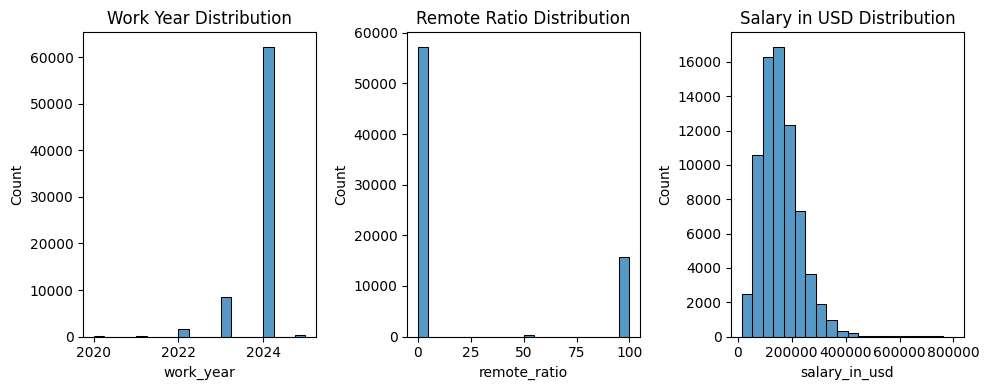

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
axes[0].set_title("Work Year Distribution")
sns.histplot(data["work_year"], ax=axes[0], bins=20)
axes[1].set_title("Remote Ratio Distribution")
sns.histplot(data["remote_ratio"], ax=axes[1], bins=20)
axes[2].set_title("Salary in USD Distribution")
sns.histplot(data["salary_in_usd"], ax=axes[2], bins=20)
plt.tight_layout()
plt.show()

From the numerical summary, we can say that:

* The remote ratio is very skewed as most workers are not remote
* The salary range is wide with some outliers in the dataset

### Check Categorical Summary

In [20]:
data.describe(include="object").T

,count,unique,top,freq
experience_level,73148,4,SE,42926
employment_type,73148,4,FT,72808
job_title,73148,289,Data Scientist,11443
employee_residence,73148,93,US,65982
company_location,73148,86,US,66035
company_size,73148,3,M,70536
salary_currency,73148,25,USD,69418


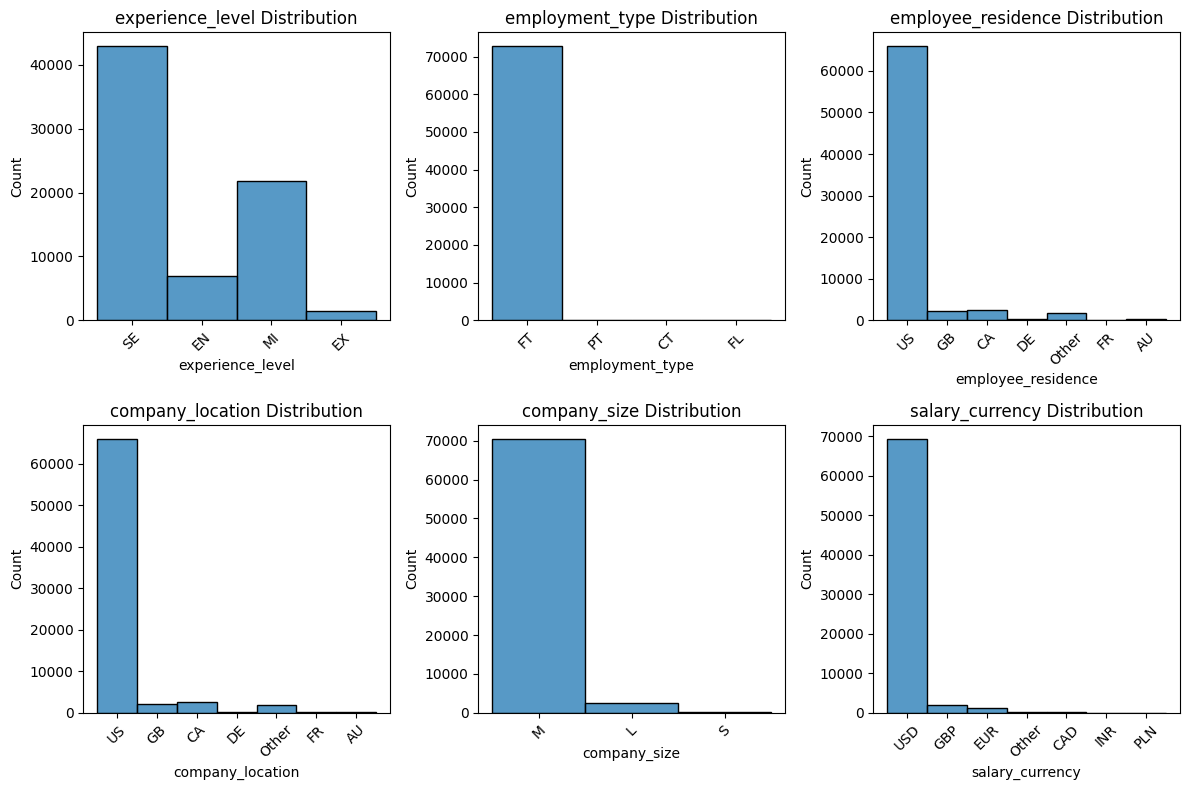

In [45]:
cat_features = list(data.select_dtypes(include="object").columns)
cat_features.remove("job_title")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for idx, feature in enumerate(cat_features):
    ax = axes[idx // 3, idx % 3]
    ax.set_title(f"{feature} Distribution")
    top = data[feature].value_counts().nlargest(6).index
    plot_data = data[feature].where(data[feature].isin(top), other="Other")
    sns.histplot(plot_data, ax=ax, bins=len(top) + 1)
    ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

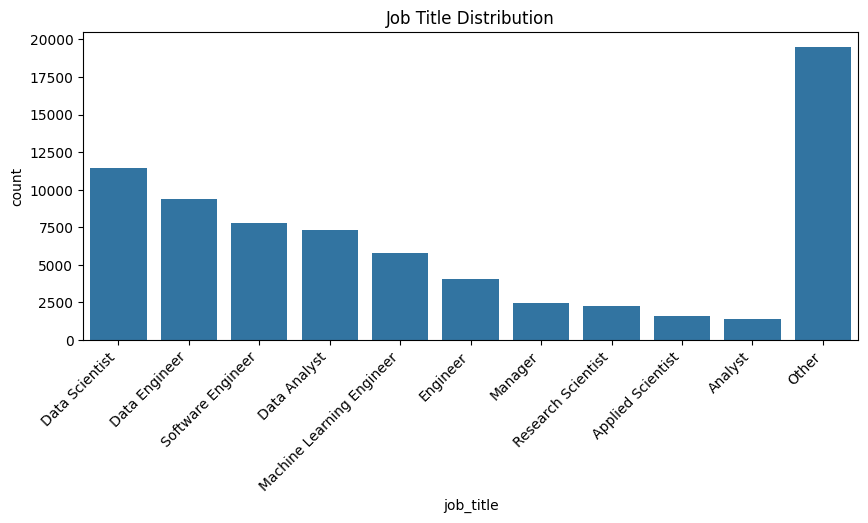

In [64]:
top = data["job_title"].value_counts().nlargest(10).copy()
top["Other"] = data["job_title"].count() - top.sum()

plt.figure(figsize=(10, 4))
plt.title("Job Title Distribution")
sns.barplot(top)
plt.xticks(rotation=45, ha="right")
plt.show()

From the categorical summary, we observe:

* Significant imbalance in several categorical features, with some showing over 90% majority values.
* The job_title field requires further investigation due to its unusually high number of unique values, suggesting a potential fragmentation issue.

### Check feature correlations
We can use the [dython](https://pypi.org/project/dython/) package to visualize feature correlations for both numerical and categorical features.

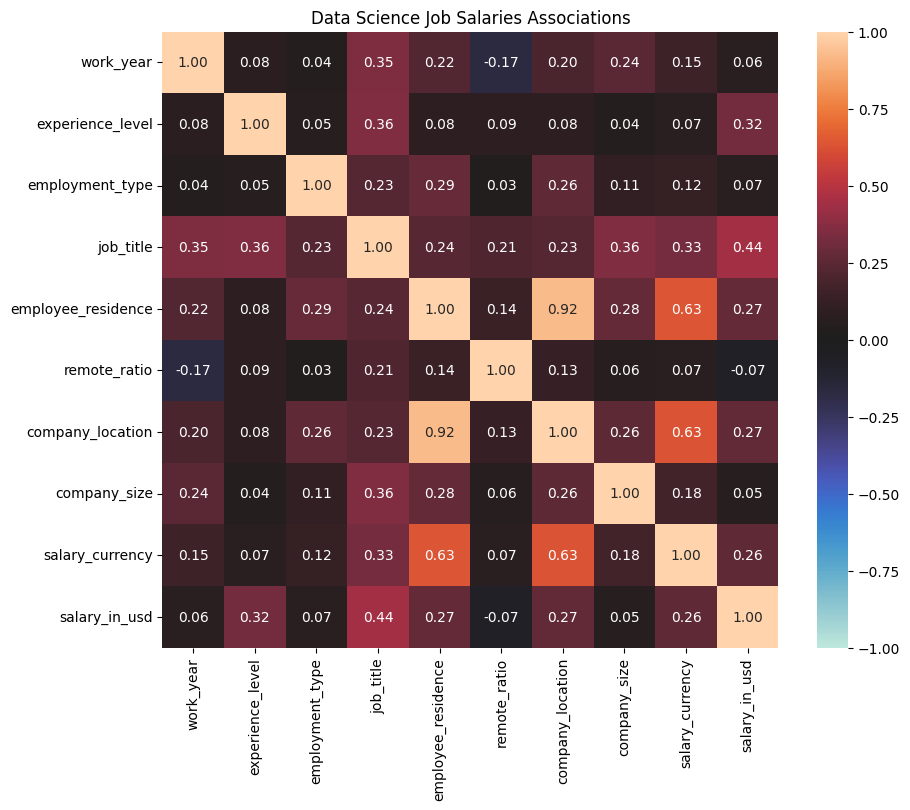

In [66]:
from dython.nominal import associations

associations(
    data.drop(columns=["salary"]), figsize=(10, 8), title="Data Science Job Salaries Associations"
);

### Check `job_title` feature
As we can see from the summary, the job_title field requires further investigation due to its unusually high number of unique values, suggesting a potential fragmentation issue. Also the correlation between job_title and `salary_in_usd` is very strong.

In [67]:
data["job_title"].value_counts().reset_index()

,job_title,count
0,Data Scientist,11443
1,Data Engineer,9405
2,Software Engineer,7814
3,Data Analyst,7334
4,Machine Learning Engineer,5807
...,...,...
284,Quantitative Research Analyst,1
285,Marketing Data Scientist,1
286,Applied Research Scientist,1
287,CRM Data Analyst,1


There are 289 unique job titles in the dataset, which is quite high. Also many of them are very similar. For example, we have "Data Analyst", "Analyst" which need to be merged.

### Check `experience_level` feature
Th experience level field also have a strong correlation with `salary_in_usd`. Let see the distribution of the field.

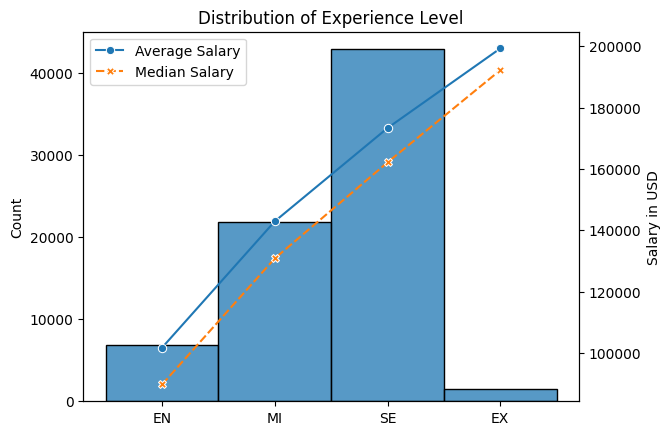

In [68]:
experience_level = pd.Categorical(data["experience_level"], ["EN", "MI", "SE", "EX"])

fig, ax1 = plt.subplots()
ax1.set_ylabel("Count")
sns.histplot(experience_level, ax=ax1)
salary_stats = (
    data.groupby("experience_level")["salary_in_usd"]
    .agg(["mean", "median"])
    .reindex(["EN", "MI", "SE", "EX"])
)
salary_stats = salary_stats.rename(columns={"mean": "Average Salary", "median": "Median Salary"})

ax2 = ax1.twinx()
ax2.set_ylabel("Salary in USD")
sns.lineplot(data=salary_stats, ax=ax2, markers=True)
plt.title("Distribution of Experience Level");

### Check `company_location` feature
Th company location field also have a strong correlation with `salary_in_usd`. Let see the distribution of the field.

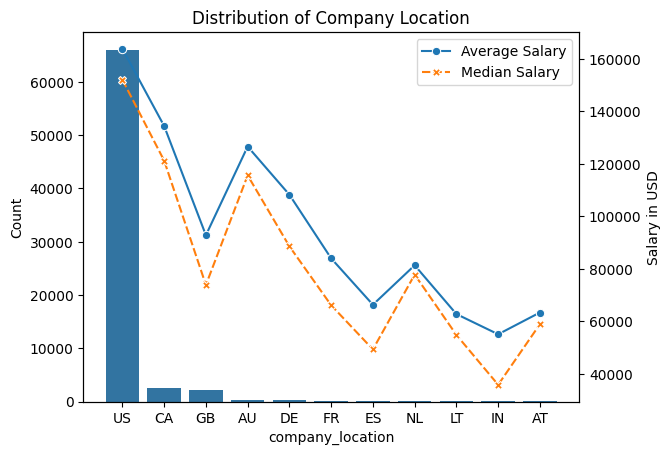

In [69]:
company_location = data["company_location"].value_counts()
company_location = company_location[company_location > 100]

fig, ax1 = plt.subplots()
ax1.set_ylabel("Count")
sns.barplot(company_location, ax=ax1)
salary_stats = (
    data.loc[data["company_location"].isin(company_location.index)]
    .groupby("company_location")["salary_in_usd"]
    .agg(["mean", "median"])
)
salary_stats = salary_stats.reindex(company_location.index)
salary_stats = salary_stats.rename(columns={"mean": "Average Salary", "median": "Median Salary"})

ax2 = ax1.twinx()
ax2.set_ylabel("Salary in USD")
sns.lineplot(data=salary_stats, ax=ax2, markers=True)
plt.title("Distribution of Company Location");

### Check `employee_residence` feature
Th employee residence field also have a strong correlation with `salary_in_usd`. Let see the distribution of the field.

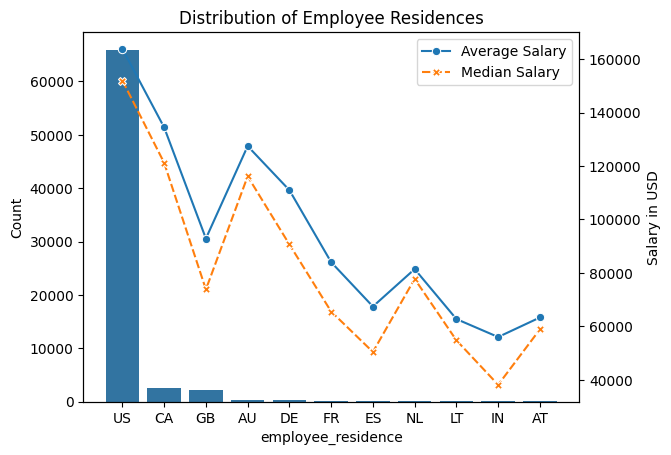

In [70]:
employee_residence = data["employee_residence"].value_counts()
employee_residence = employee_residence[employee_residence > 100]

fig, ax1 = plt.subplots()
ax1.set_ylabel("Count")
sns.barplot(employee_residence, ax=ax1)
salary_stats = (
    data.loc[data["employee_residence"].isin(employee_residence.index)]
    .groupby("employee_residence")["salary_in_usd"]
    .agg(["mean", "median"])
)
salary_stats = salary_stats.reindex(employee_residence.index)
salary_stats = salary_stats.rename(columns={"mean": "Average Salary", "median": "Median Salary"})

ax2 = ax1.twinx()
ax2.set_ylabel("Salary in USD")
sns.lineplot(data=salary_stats, ax=ax2, markers=True)
plt.title("Distribution of Employee Residences");

### Key findings
#### Dataset Structure
- Contains 73,148  entries with no missing values
- 11 columns including both numerical and categorical data

#### Salary Insights:
- Wide range of salaries with some notable outliers
- Clear progression in salaries across experience levels (EN → MI → SE)
- USD is the dominant currency (88,796 entries)

#### Company Demographics:
- US dominates both company locations and employee residence
- Employee residence are closely correlated with the companies location
- US companies have the highest average salary

#### Job Market:
- Clear salary hierarchy among job titles
- Company Location and Employee residential area correlate with salary amount
- No significant correlation between work year and salary
- Experience level strongly influences salary levels